# Table of contents
- [01 Importing Moduls](#01-Importing-Moduls)

### 01 Importing Moduls

In [132]:
#!pip install yfinance 


In [233]:
import numpy as np
import pandas as pd 
import yfinance as yf
import datetime
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia
from gensim.parsing.preprocessing import STOPWORDS, strip_tags, strip_numeric, strip_punctuation, strip_multiple_whitespaces, remove_stopwords, strip_short, stem_text
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')
import keras
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression

In [234]:
# in this case: Zoom
data=yf.download(tickers='ZM', period='max', interval='1d')
data.info()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 549 entries, 2019-04-18 to 2021-06-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       549 non-null    float64
 1   High       549 non-null    float64
 2   Low        549 non-null    float64
 3   Close      549 non-null    float64
 4   Adj Close  549 non-null    float64
 5   Volume     549 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 30.0 KB


In [235]:
data['datetime']=data.index
#data.reset_index()
#data.drop("Date", inplace=True)

In [236]:
#!pip install ta # for getting financial indicators 
from ta import add_all_ta_features 


In [237]:
data = add_all_ta_features(
    data, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

invalid value encountered in double_scalars
invalid value encountered in double_scalars


In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 549 entries, 2019-04-18 to 2021-06-22
Data columns (total 90 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Open                       549 non-null    float64       
 1   High                       549 non-null    float64       
 2   Low                        549 non-null    float64       
 3   Close                      549 non-null    float64       
 4   Adj Close                  549 non-null    float64       
 5   Volume                     549 non-null    int64         
 6   datetime                   549 non-null    datetime64[ns]
 7   volume_adi                 549 non-null    float64       
 8   volume_obv                 549 non-null    int64         
 9   volume_cmf                 549 non-null    float64       
 10  volume_fi                  549 non-null    float64       
 11  volume_mfi                 549 non-null    float64  

Text(0, 0.5, 'Zoom Opening Stock')

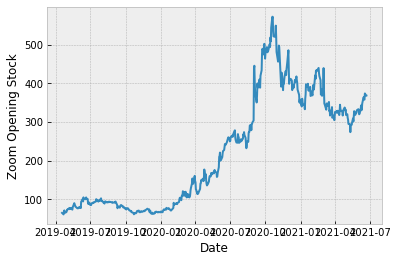

In [239]:
plt.plot(data.datetime,data.Open)
plt.xlabel("Date")
plt.ylabel("Zoom Opening Stock")

In [240]:
#pip install finnhub-python
#!pip install pystan==2.19.1.1.
#!pip install  prophet

In [241]:
import finnhub

# Setup client
finnhub_client = finnhub.Client(api_key="c2si65iad3ic1qis06lg")

In [242]:
def get_news(company, date_from='2020-01-01', date_to=None):
    '''
    returns dataframe with average sentiment of news headline and sentiment of news summary for every date in a given timeframe
    company: symbol, example ZM
    date_from: string format yyyy-mm-dd
    date_to: string format yyyy-mm-dd
    '''
    sid_obj = sia()
    if date_to is None:
        date_to = datetime.date.today().strftime("%Y-%m-%d")
    result=(finnhub_client.company_news(company, _from=date_from, to=date_to))
    news_df = pd.DataFrame(result)
    news_df['datetime'] = [datetime.datetime.utcfromtimestamp(i).strftime('%Y-%m-%d') for i in news_df.datetime]
    news_df.drop(['id','image', 'related','source', 'url'], axis=1, inplace=True)
    news_df['headline_sentiment'] = [sid_obj.polarity_scores(c)['compound'] for c in news_df['headline']]
    news_df['summary_sentiment'] = [sid_obj.polarity_scores(c)['compound'] for c in news_df['summary']]
    news_dates = news_df.groupby(['datetime']).mean().sort_index().reset_index()
    return news_dates

In [243]:
news_dates=get_news("ZM", date_from='2020-01-01')
#news_dates.info()

In [244]:
news_dates['datetime']=news_dates['datetime'].astype('datetime64[ns]')#datetime64
data['datetime']=data['datetime'].astype('datetime64[ns]')
df=news_dates.merge(data,on="datetime",how='inner')

In [245]:
news_dates.tail()

,datetime,headline_sentiment,summary_sentiment
57,2021-06-18,0.460917,0.293633
58,2021-06-19,0.374033,0.689467
59,2021-06-20,0.000000,0.000000
60,2021-06-21,0.090050,0.343317
61,2021-06-22,0.082200,0.371250


In [246]:
df_plot=df[df.datetime > '2021-03-01']

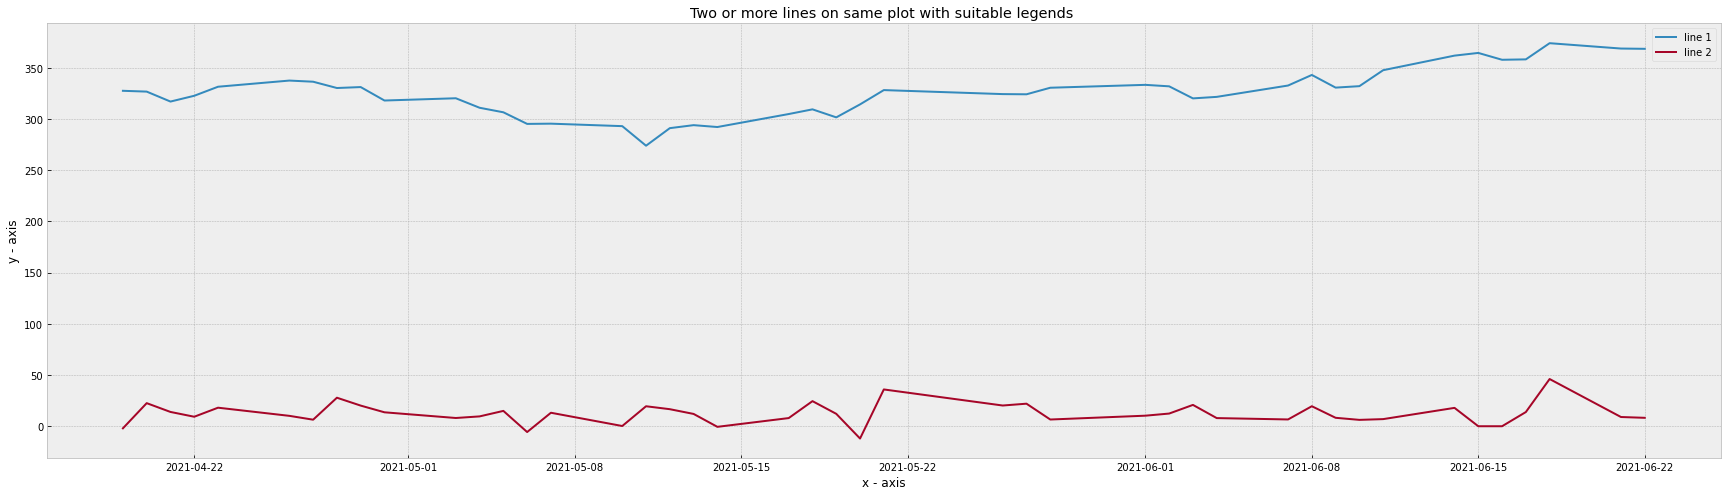

In [247]:
plt.figure(figsize=[30,8])
x1 = df_plot.datetime
y1 = df_plot.Open
# plotting the line 1 points 
plt.plot(x1, y1, label = "line 1")
# line 2 points
x2 = df_plot.datetime
y2 = df_plot.headline_sentiment*100
# plotting the line 2 points 
plt.plot(x2, y2, label = "line 2")
#plt.yscale("log")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [248]:
df.tail()

,datetime,headline_sentiment,summary_sentiment,Open,High,Low,Close,Adj Close,Volume,volume_adi,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
40,2021-06-16,0.000000,0.169444,357.815002,366.829987,355.410004,361.829987,361.829987,2669200,2.452787e+08,...,-14.890361,35.324017,339.045217,9.139441,1.575372,5.231843,-3.656471,0.788297,0.785206,483.596753
41,2021-06-17,0.138514,0.339914,358.204987,374.519989,358.204987,372.950012,372.950012,3416600,2.480378e+08,...,-2.790078,39.612412,345.570746,13.801419,1.073381,4.400150,-3.326770,3.073274,3.026994,501.532278
42,2021-06-18,0.460917,0.293633,374.010010,379.890015,370.929993,374.239990,374.239990,4554400,2.468483e+08,...,-9.166163,41.810456,349.895035,14.407999,3.171673,4.154455,-0.982782,0.345885,0.345288,503.612887
43,2021-06-21,0.090050,0.343317,368.779999,372.623993,363.290009,369.250000,369.250000,1881600,2.473696e+08,...,-17.261538,40.985744,351.580832,15.748719,-1.165809,3.090402,-4.256211,-1.333366,-1.342336,495.564516
44,2021-06-22,0.082200,0.371250,368.510010,377.000000,368.500000,374.934998,374.934998,764368,2.477626e+08,...,-8.038637,41.392267,354.274141,11.587797,-7.649985,0.942325,-8.592310,1.539607,1.527875,504.733867


# Random Forest for Feature Importance 

In [249]:
#shifting 
move_days = 7
# shifted values column, like this the model can learn what the price is going to be x days later
df["shift_close"]=df[["Close"]].shift(-move_days)

In [250]:
df.tail()

,datetime,headline_sentiment,summary_sentiment,Open,High,Low,Close,Adj Close,Volume,volume_adi,...,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,shift_close
40,2021-06-16,0.000000,0.169444,357.815002,366.829987,355.410004,361.829987,361.829987,2669200,2.452787e+08,...,35.324017,339.045217,9.139441,1.575372,5.231843,-3.656471,0.788297,0.785206,483.596753,NaN
41,2021-06-17,0.138514,0.339914,358.204987,374.519989,358.204987,372.950012,372.950012,3416600,2.480378e+08,...,39.612412,345.570746,13.801419,1.073381,4.400150,-3.326770,3.073274,3.026994,501.532278,NaN
42,2021-06-18,0.460917,0.293633,374.010010,379.890015,370.929993,374.239990,374.239990,4554400,2.468483e+08,...,41.810456,349.895035,14.407999,3.171673,4.154455,-0.982782,0.345885,0.345288,503.612887,NaN
43,2021-06-21,0.090050,0.343317,368.779999,372.623993,363.290009,369.250000,369.250000,1881600,2.473696e+08,...,40.985744,351.580832,15.748719,-1.165809,3.090402,-4.256211,-1.333366,-1.342336,495.564516,NaN
44,2021-06-22,0.082200,0.371250,368.510010,377.000000,368.500000,374.934998,374.934998,764368,2.477626e+08,...,41.392267,354.274141,11.587797,-7.649985,0.942325,-8.592310,1.539607,1.527875,504.733867,NaN


In [254]:
#x without the NaNs 
X = np.array(df.drop(['shift_close','datetime'],1))[:-move_days]
X = np.array(df.drop(['shift_close','datetime'],1))[:-move_days]


In [255]:
# have to make this work somehow
#X= SelectKBest(f_regression, k=20).fit_transform(X, y)
#X = X[:-move_days]

In [256]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [257]:
# training a model on the dataset where we have all data
param_grid = {'min_samples_leaf': [2,3,5,10,20], 'n_estimators': [3,5,10,50,100]}
rf = RandomForestRegressor(random_state = 42)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid={'min_samples_leaf': [2, 3, 5, 10, 20],
                         'n_estimators': [3, 5, 10, 50, 100]})

In [258]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_leaf=2, n_estimators=50, random_state=42)

In [259]:
rf=RandomForestRegressor(min_samples_leaf=2, n_estimators=3, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2, n_estimators=3, random_state=42)

In [260]:
y_pred_existing=rf.predict(X_test)

In [261]:
print(mean_squared_error(y_test, y_pred_existing))

80.45723103769305


In [262]:
# Now the X variable is going to be the features for the days where we have no "in x Days price"
X_pred=df.drop(['shift_close','datetime'],1)[:-move_days]
X_pred=X_pred.tail(move_days)
#X_pred=np.array(X_pred)
#print(X_pred)

In [263]:
#values for the next 7 days 
pred=rf.predict(X_pred)
pred

array([361.77066091, 361.77066091, 364.99482778, 372.80444336,
       372.80444336, 372.80444336, 372.80444336])

In [181]:
import shap

In [182]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_pred)


In [183]:
df.columns

Index(['datetime', 'headline_sentiment', 'summary_sentiment', 'Open', 'High',
       'Low', 'Close', 'Adj Close', 'Volume', 'volume_adi', 'volume_obv',
       'volume_cmf', 'volume_fi', 'volume_mfi', 'volume_em', 'volume_sma_em',
       'volume_vpt', 'volume_nvi', 'volume_vwap', 'volatility_atr',
       'volatility_bbm', 'volatility_bbh', 'volatility_bbl', 'volatility_bbw',
       'volatility_bbp', 'volatility_bbhi', 'volatility_bbli',
       'volatility_kcc', 'volatility_kch', 'volatility_kcl', 'volatility_kcw',
       'volatility_kcp', 'volatility_kchi', 'volatility_kcli',
       'volatility_dcl', 'volatility_dch', 'volatility_dcm', 'volatility_dcw',
       'volatility_dcp', 'volatility_ui', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast',
       'trend_ema_slow', 'trend_adx', 'trend_adx_pos', 'trend_adx_neg',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_ma

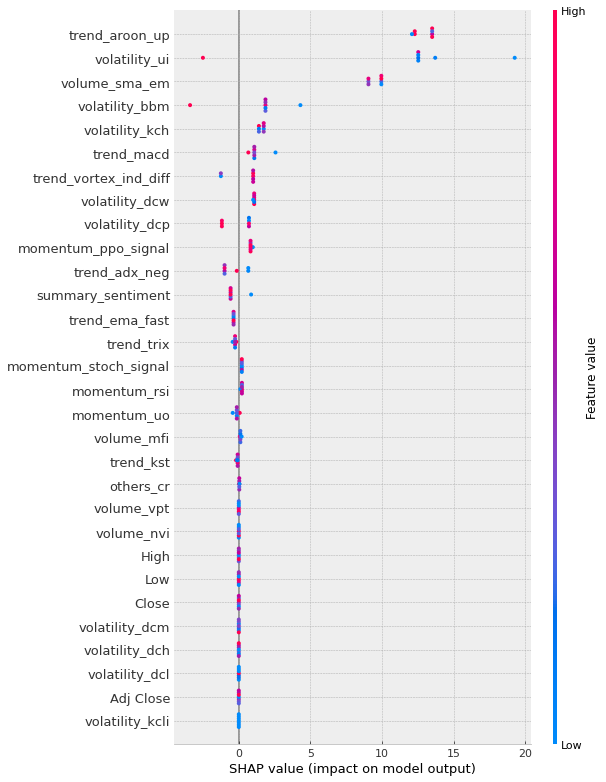

In [185]:
shap.summary_plot(shap_values, X_test,feature_names=X_test.columns,max_display=30)

In [189]:
df_feature_importance = pd.DataFrame(rf.feature_importances_, index=X_pred.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
print(df_feature_importance)

                 feature importance
trend_aroon_up             0.278769
volume_sma_em              0.235894
volatility_ui              0.210814
volatility_bbm             0.102481
volatility_dcw             0.058361
...                             ...
volatility_kcw             0.000000
volatility_kcl             0.000000
volatility_kcc             0.000000
volatility_bbli            0.000000
trend_ema_slow             0.000000

[91 rows x 1 columns]


Text(0, 0.5, 'Price')

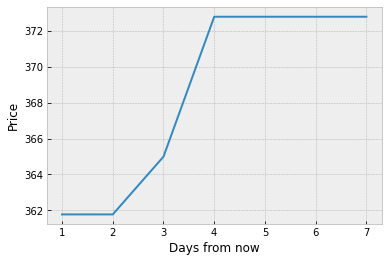

In [276]:
plt.plot(np.arange(1,move_days+1,1),pred)
plt.xlabel("Days from now")
plt.ylabel("Price")

### Need to think of a way to plot this nicely

## Facebook Prophet on Close Price

In [66]:
# FB Prophet 

In [101]:
from prophet import Prophet
from prophet.plot import plot_plotly

In [87]:
df

,datetime,headline_sentiment,summary_sentiment,Open,High,Low,Close,Adj Close,Volume,volume_adi,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
0,2020-05-26,0.202300,0.848100,169.100006,169.690002,163.119995,164.000000,164.000000,6689700,4.018691e+07,...,-40.937408,18.210397,163.904497,3.929022,-23.168123,-18.696083,-4.472040,-4.127205,-4.214793,164.516129
1,2021-04-15,0.000000,0.426700,334.144989,338.420013,327.459991,332.380005,332.380005,3360700,2.299012e+08,...,-29.601849,-6.399403,341.863092,7.779107,-11.243080,-13.036523,1.793443,0.965976,0.961340,436.096782
2,2021-04-16,0.113333,0.374867,330.269989,333.750000,326.869995,329.950012,329.950012,2476500,2.296420e+08,...,-35.292701,-4.193097,341.755292,5.351387,-12.912611,-13.011741,0.099130,-0.731089,-0.733774,432.177439
3,2021-04-19,0.005293,0.036893,327.519989,337.795013,320.500000,324.329987,324.329987,3131900,2.278972e+08,...,-48.454359,0.010507,341.676069,0.946179,-12.653903,-12.940173,0.286270,-1.703296,-1.717969,423.112882
4,2021-04-20,0.225430,0.423340,326.730011,327.549988,316.359985,321.779999,321.779999,2282500,2.278258e+08,...,-68.574804,-0.050032,341.337949,-1.364072,-14.358807,-13.223900,-1.134907,-0.786233,-0.789340,418.999998
5,2021-04-21,0.139536,0.305936,317.010010,323.109985,313.500000,322.760010,322.760010,1917500,2.296037e+08,...,-69.736814,-2.494620,341.253629,-0.370410,-16.604041,-13.899928,-2.704112,0.304559,0.304096,420.580661
6,2021-04-22,0.092689,0.255689,322.665009,338.049988,322.665009,328.320007,328.320007,3328300,2.287221e+08,...,-52.318266,-2.561342,341.144188,-0.445739,-14.690295,-14.058002,-0.632293,1.722641,1.707972,429.548399
7,2021-04-23,0.180989,0.168844,331.489990,338.549988,328.239990,336.880005,336.880005,2454300,2.303813e+08,...,-25.824832,-2.012873,340.979157,4.271394,-15.263777,-14.299157,-0.964621,2.607212,2.573803,443.354847
8,2021-04-26,0.101445,0.243973,337.510010,338.000000,329.209991,336.420013,336.420013,2286700,2.318460e+08,...,-27.284196,-1.398728,340.788466,1.551562,-16.059825,-14.651290,-1.408535,-0.136545,-0.136638,442.612925
9,2021-04-27,0.063880,-0.070620,336.390015,341.679993,330.890015,333.489990,333.489990,2208300,2.307019e+08,...,-36.579958,1.346775,340.535403,3.359677,-16.807591,-15.082551,-1.725040,-0.870942,-0.874757,437.887081


In [97]:
data.reset_index(inplace=True)
df_train = data[['datetime','Close']]
df_train = df_train.rename(columns={"datetime": "ds", "Close": "y"})
df_train

,ds,y
0,2019-04-18,62.000000
1,2019-04-22,65.699997
2,2019-04-23,69.000000
3,2019-04-24,63.200001
4,2019-04-25,65.000000
...,...,...
542,2021-06-14,365.910004
543,2021-06-15,359.000000
544,2021-06-16,361.829987
545,2021-06-17,372.950012


In [115]:
m = Prophet(interval_width=0.95)
m.fit(df_train)
future = m.make_future_dataframe(periods=21, freq ='D')
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [117]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
563,2021-07-05,339.340095,307.744927,390.156291,334.496460,343.932563,12.243011,12.243011,12.243011,12.686741,12.686741,12.686741,-0.443730,-0.443730,-0.443730,0.0,0.0,0.0,351.583106
564,2021-07-06,339.093285,310.966649,393.119029,333.442707,344.046884,12.296136,12.296136,12.296136,12.889831,12.889831,12.889831,-0.593694,-0.593694,-0.593694,0.0,0.0,0.0,351.389421
565,2021-07-07,338.846475,308.969729,390.015686,332.871971,344.243317,11.342651,11.342651,11.342651,12.085319,12.085319,12.085319,-0.742668,-0.742668,-0.742668,0.0,0.0,0.0,350.189126
566,2021-07-08,338.599665,308.651694,391.958149,332.423485,344.491413,11.084360,11.084360,11.084360,11.974928,11.974928,11.974928,-0.890568,-0.890568,-0.890568,0.0,0.0,0.0,349.684024
567,2021-07-09,338.352855,309.163196,394.566232,331.697746,344.614190,13.167081,13.167081,13.167081,14.205303,14.205303,14.205303,-1.038221,-1.038221,-1.038221,0.0,0.0,0.0,351.519936


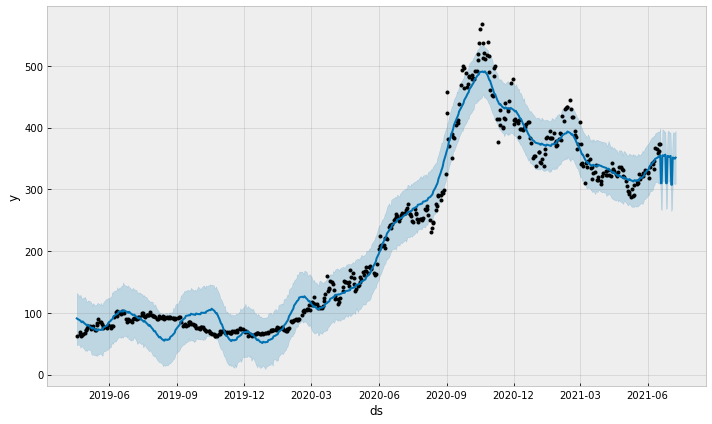

In [118]:
m.plot(forecast)
plt.show()

## LSTM Model (code should be correct, but somethings wrong with the package) 

In [125]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [129]:
len(data)/2

273.5

In [131]:
new_data = data[['datetime','Close']]
for i in range(0,len(data)):
    new_data['datetime'][i] = data['datetime'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.datetime
new_data.drop('datetime', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:274,:]
valid = dataset[274:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

<ipython-input-131-d32a4065eb23>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-131-d32a4065eb23>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



NotImplementedError: Cannot convert a symbolic Tensor (lstm_1/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported